<h1>11.1 Prelude: Tossing Coins to Collect Data<h1>

<h2>11.1.1 Direct Simulation<h2>

In [1]:
import numpy as np

In [2]:
[np.random.randint(2),np.random.randint(2)]

[1, 0]

In [3]:
samples = []; # Empty list within which to store outcomes
for i in range(100): # Repeat 100 times
    samples.append([np.random.randint(2),np.random.randint(2)]) # Append new outcomes to samples list 100 times

In [4]:
print(samples) # What do the samples look like?

[[1, 1], [1, 1], [0, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [0, 1], [1, 1], [0, 1], [1, 0], [0, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 1], [0, 1], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 1], [1, 1], [0, 0], [1, 0], [1, 0], [0, 0], [1, 1], [1, 0], [1, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 0], [0, 1], [0, 0], [0, 0], [1, 0], [0, 1], [1, 1], [1, 1], [1, 1], [1, 0], [0, 0], [1, 1], [0, 0], [1, 0], [1, 0], [1, 1], [1, 1], [1, 0], [1, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 0], [1, 0], [0, 0], [1, 1], [1, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1], [0, 0], [0, 1], [1, 1], [0, 1], [0, 1], [1, 0], [1, 1], [0, 0], [1, 1], [1, 0]]


In [5]:
entries, counts = np.unique(samples, axis=0, return_counts=True)
print(entries)
print(counts)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[26 20 25 29]


In [6]:
tally = np.vstack([entries.T, counts]).T
print(tally)

[[ 0  0 26]
 [ 0  1 20]
 [ 1  0 25]
 [ 1  1 29]]


In [7]:
def tally(samples):
    entries, counts = np.unique(samples, axis=0, return_counts=True)
    finalTally = np.vstack([entries.T, counts]).T
    return finalTally

In [8]:
print(tally(samples))

[[ 0  0 26]
 [ 0  1 20]
 [ 1  0 25]
 [ 1  1 29]]


<h2>11.1.2 A random walk through configuration space<h2>

In [9]:
coins = [1,0] # heads = 0, tails = 1
samples = [] # empty list within which to store outcomes
for i in range(100): # loop over 100 coin toss trials
    whichCoin = np.random.randint(2) # pick a coin
    coins[whichCoin] = np.random.randint(2) # toss that coin
    samples.append(coins.copy()) # add new outcome to samples
samplesTally = tally(samples)
print(samplesTally)

[[ 0  0 33]
 [ 0  1 29]
 [ 1  0 20]
 [ 1  1 18]]


In [10]:
samplesTally[samplesTally[:, 2].argsort()] # Sorted by occurances, increasing

array([[ 1,  1, 18],
       [ 1,  0, 20],
       [ 0,  1, 29],
       [ 0,  0, 33]])

In [11]:
def count(samples,entry):
    pairs, counts = np.unique(samples, axis=0, return_counts=True) # tally
    for i in range(len(pairs)):
        if np.array_equal(pairs[i],entry):
            return counts[i]

In [12]:
count(samples,np.array([0,0]))

33

In [13]:
count(samples,np.array([0,0]))/len(samples)

0.33

<h2>11.1.3 A random walk through coin space<h2>

In [14]:
def flip(coins,whichCoin):
    newCoins = coins.copy()
    if coins[whichCoin] == 0: # if its currently heads
        newCoins[whichCoin] = 1 # then heads->tails
    else:
        newCoins[whichCoin] = 0 # else tails->heads
    return newCoins

In [15]:
flip([0,0],1)

[0, 1]

In [16]:
coins = [1,0] # heads = 0, tails = 1
samples = []
for i in range(10000):
    whichCoin = np.random.randint(2)
    coins=flip(coins,whichCoin)
    samples.append(coins.copy())
count(samples,[0,0])/len(samples)


0.2518

<h2>11.1.4 What if the probabilities are not uniform?<h2>

In [17]:
pH = 0.75
def probability(coins):
    if coins == [0,0]:
        return pH*pH
    if coins == [0,1]:
        return pH*(1-pH)
    if coins == [1,0]:
        return (1-pH)*pH
    if coins == [1,1]:
        return (1-pH)*(1-pH)

In [18]:
probability([0,0])

0.5625

In [19]:
coins = [1,0]
samples = []
for i in range(10000):
    whichCoin = np.random.randint(2)
    newCoins = flip(coins,whichCoin)
    if probability(newCoins)/probability(coins)>1:
        coins=newCoins
    else:
        if np.random.random() <= probability(newCoins)/probability(coins):
            coins = newCoins
    samples.append(coins.copy())
count(samples,[0,0])/len(samples)

0.5699

<h1>11.2 Metropolis Monte Carlo Algorithm<h1>

<h2>11.2.1<h2>

<h2>11.2.2<h2>

<h1>11.3 Examples<h1>

<h2>11.3.1 Average population of vibrational energies as a function of temperature Partition function solution<h2>

In [20]:
import sympy as sy
import matplotlib.pyplot as plt

In [21]:
def energyVibDiatomic(hbarOmega,v):
    return hbarOmega*(v+0.5)
print(energyVibDiatomic(1,0))

0.5


In [22]:
def qExact(kT,hbarOmega):
    v = sy.symbols('v')
    return float(sy.Sum(sy.exp(-energyVibDiatomic(hbarOmega,v)/kT), (v, 0, sy.oo))) # Summation from 0 to infinity
print(qExact(1,1))

0.9595173756674719


In [23]:
def exactProbResult(kT,hbarOmega,v):
    return sy.exp(-energyVibDiatomic(hbarOmega,v)/kT)/qExact(kT,hbarOmega)
print(exactProbResult(1,1,0))

0.632120558828558


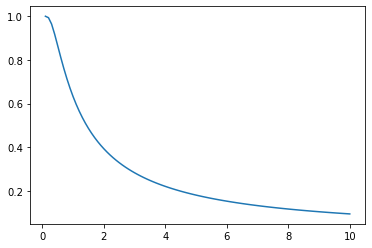

In [24]:
xList = np.linspace(10**-1,10,100)
yList = np.zeros(100)
for i in range(len(xList)):
    yList[i] = exactProbResult(xList[i],1,0)
plt.plot(xList,yList)

In [25]:
exactProbResult(1,1,0) # probability when v=0 and kT=1, hbarOmega=1

0.632120558828558

In [26]:
def MCstep(kT,hbarOmega,v):
    vprime = np.maximum(v+(-1)**np.random.randint(2),0) # Randomly, v->v+1 or v->v-1, but v will not go below 0
    deltaE = energyVibDiatomic(hbarOmega,vprime) - energyVibDiatomic(hbarOmega,v)
    if deltaE <= 0 or np.random.random() <= sy.exp(-deltaE/kT):
        return vprime
    return v

In [27]:
v, hbarOmega, kT = 0,1,1
for i in range(100):
    v = MCstep(kT,hbarOmega,v)

In [28]:
vSamples=[]
for i in range(1000000):
    v = MCstep(kT,hbarOmega,v)
    if i%100 == 0:
        vSamples.append(v)

In [29]:
entries, counts = np.unique(vSamples, axis=0, return_counts=True)
tally = np.vstack([entries.T, counts]).T
print(tally)

[[   0 6363]
 [   1 2297]
 [   2  846]
 [   3  314]
 [   4  116]
 [   5   37]
 [   6   18]
 [   7    6]
 [   8    1]
 [   9    1]
 [  11    1]]


In [30]:
count(vSamples,0)/len(vSamples) 

0.6363

In [31]:
def runMC(kT, hbarOmega, nEquil, nDataCol):
    v = 0
    vSamples = []
    for i in range(nEquil): # Equilibriation
        v = MCstep(kT, hbarOmega, v)
    for i in range(nDataCol): # Data collection
        v = MCstep(kT, hbarOmega, v)
        if i%100 == 0:
            vSamples.append(v)
    return vSamples

def MCProbResult(vSamples, vTarget):
    return count(vSamples, vTarget)/len(vSamples)

In [32]:
kT, hbarOmega = 1, 1
xList = []
convergenceTest = []
for nDataCol in range(1000,100000,2000):
    xList.append(nDataCol)
    convergenceTest.append(MCProbResult(runMC(kT, hbarOmega, 100, nDataCol),0))
print(convergenceTest)

[0.6, 0.6, 0.72, 0.6571428571428571, 0.6333333333333333, 0.6727272727272727, 0.6307692307692307, 0.6533333333333333, 0.6352941176470588, 0.6526315789473685, 0.638095238095238, 0.6347826086956522, 0.656, 0.674074074074074, 0.6172413793103448, 0.6483870967741936, 0.6242424242424243, 0.6142857142857143, 0.6, 0.6538461538461539, 0.6365853658536585, 0.6186046511627907, 0.66, 0.6297872340425532, 0.636734693877551, 0.6411764705882353, 0.6264150943396226, 0.6436363636363637, 0.6192982456140351, 0.6406779661016949, 0.6524590163934426, 0.6333333333333333, 0.6307692307692307, 0.6686567164179105, 0.663768115942029, 0.6535211267605634, 0.6383561643835617, 0.616, 0.625974025974026, 0.6215189873417721, 0.645679012345679, 0.6277108433734939, 0.62, 0.6206896551724138, 0.6303370786516854, 0.6252747252747253, 0.6408602150537634, 0.6463157894736842, 0.6536082474226804, 0.6222222222222222]


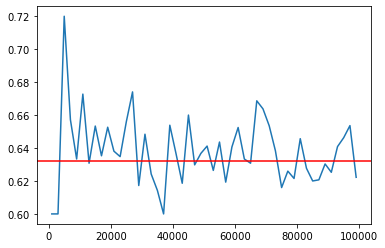

In [33]:
plt.plot(xList,convergenceTest)
plt.axhline(y=exactProbResult(1,1,0), color='r', linestyle='-')

<h2>11.3.2 Vibrational heat capacity<h2>

In [34]:
def avgE(hbarOmega,kT):
    v = sy.symbols('v')
    energyVib = energyVibDiatomic(hbarOmega,v)
    return float(sy.Sum(energyVib*sy.exp(-energyVib/kT), (v, 0, sy.oo))/qExact(kT,hbarOmega)) # Summation from 0 to infinity

In [35]:
dh=10**-3 # define the step size
(avgE(1,1+dh)-avgE(1,1))/dh # calculate forward difference

0.9207489975249228

In [36]:
(avgE(1,1)-avgE(1,1-dh))/dh # reverse difference, previously defined %dhist

0.9205980498181443

In [37]:
(avgE(1,1+dh/2)-avgE(1,1-dh/2))/dh # central difference, previously defined dh

0.9206735765732166

In [38]:
def avgE2(hbarOmega,kT):
    v = sy.symbols('v')
    energyVib = energyVibDiatomic(hbarOmega,v)
    return float(sy.Sum(energyVib**2*sy.exp(-energyVib/kT), (v, 0, sy.oo))/qExact(kT,hbarOmega)) # Summation from 0 to infinity

In [39]:
(avgE2(1,1)-avgE(1,1)**2)/1**2 # via standard deviation

0.9206735942077924

In [40]:
dh=10**-3
def heatCapacityExactFiniteDiff(hbarOmega,kT):
    return (avgE(hbarOmega,kT+dh/2)-avgE(hbarOmega,kT-dh/2))/dh
def heatCapacityExactStdDev(hbarOmega,kT):
    return(avgE2(hbarOmega,kT)-avgE(hbarOmega,kT)**2)/kT**2

In [41]:
def runMCv2(kT,hbarOmega,nEquil,nDataCol):
    # Initialize local variables
    v=0
    ESamples=[]
    E2Samples=[]
    
    # Equilibriation
    for i in range(nEquil):
        v = MCstep(kT,hbarOmega,v)
        
    # Data collection
    for i in range(nDataCol):
        v = MCstep(kT,hbarOmega,v)
        if i%100 == 0:
            ESamples.append(energyVibDiatomic(hbarOmega,v))
            E2Samples.append((energyVibDiatomic(hbarOmega,v))**2)
    
    return (ESamples, E2Samples)

kT, hbarOmega = 1,1
ESamples, E2Samples = runMCv2(kT,hbarOmega,100,50000)

In [42]:
def heatCapacityFromSamples(ESamples, E2Samples, kT):
    return (np.mean(np.array(E2Samples))-np.mean(np.array(ESamples))**2)/kT**2

In [43]:
def heatCapacityFromSamplesVariance(ESamples, kT):
    return np.var(np.array(ESamples))/kT**2

In [44]:
print(heatCapacityExactStdDev(hbarOmega,kT))
print(heatCapacityFromSamples(ESamples,E2Samples,kT))
print(heatCapacityFromSamplesVariance(ESamples,kT))

0.9206735942077924
0.764556
0.7645559999999998
